# Table of contents

1. [Business Understanding](#Business_Understanding)
2. [Prepare Data](#Prepare_Data)
3. [Data Understanding](#Data_Understanding)

# 1. Business Understanding

The data represents the reaction taken by population in a large residential area when they receive direct mailing data advertisements, whether they respond to the sent advertisement or not. Their responses are recorded in the target feature column.

In this notebook I am using visualisation tools to assist me for an exploration of the dataset answering the following questions:

* What is the data size?
* What is the important information that can be extracted from this data?
* Can we identify the best variables to link to the target feature?

[Link to business questions](#Business_Questions)


<a id='Prepare_Data'></a>
# 2. Prepare Data

### Importing Libraries

In [1]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import folium
import seaborn as sns
from uszipcode import SearchEngine

%matplotlib inline
import plotly.offline as pyo
import plotly.graph_objs as go # interactive plotting library

import json
import io

### Loading Data

In [33]:
# Loading csv file into dataframe
df_population_raw = pd.read_csv('data/Recruiting_Task_InputData.csv', low_memory=False)

### 2.1. What are our variables? 

In [3]:
# Number of rows and columns in the dataframe
print(df_population_raw.shape)
df_population_raw.head(3) #visualize dataframe

(10000, 10)


,name,age,lifestyle,zip code,family status,car,sports,earnings,living area,label
0,VnSEFOuL,62.0,cozily,50168.0,married,practical,athletics,102526.0,urban,no response
1,8Tv0hcce,34.0,active,66479.0,married,expensive,soccer,33006.0,urban,no response
2,Zny9ysbk,69.0,healthy,16592.0,single,expensive,badminton,118760.0,urban,response


In [4]:
df_population_raw[['zip code', 'age', 'earnings']] = df_population_raw[['zip code', 'age', 'earnings']].astype(int)

In [5]:
# General statistics of the data
df_population_raw.describe()

,age,zip code,earnings
count,10000.000000,10000.000000,10000.000000
mean,42.090700,55227.270600,85337.799600
std,15.874416,26139.756227,37554.523323
min,15.000000,10003.000000,20006.000000
25%,28.000000,32708.250000,53237.250000
50%,42.000000,55290.000000,85617.500000
75%,56.000000,77967.750000,118111.000000
max,69.000000,99982.000000,149975.000000


In [6]:
# Dataframe columns information: type and missing values
df_population_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           10000 non-null  object
 1   age            10000 non-null  int64 
 2   lifestyle      10000 non-null  object
 3   zip code       10000 non-null  int64 
 4   family status  10000 non-null  object
 5   car            10000 non-null  object
 6   sports         8500 non-null   object
 7   earnings       10000 non-null  int64 
 8   living area    10000 non-null  object
 9   label          10000 non-null  object
dtypes: int64(3), object(7)
memory usage: 781.4+ KB


### 2.2. Data cleaning
#### - missing values imputation

In [7]:
print(df_population_raw['sports'].isna().value_counts())

False    8500
True     1500
Name: sports, dtype: int64


In [8]:
# there are 1500 cells in the sport column with no value. We replace them with "Unknown"
df_population_raw['sports'] = df_population_raw['sports'].fillna('unknown')

#### - deduplication

In [9]:
duplicateID = df_population_raw[df_population_raw.duplicated(['name'])]
print("we have", len(duplicateID.index), "duplicate name values")

we have 0 duplicate name values


<a id='Data_Understanding'></a>
# 3. Data Understanding

### 3.1 Data Exploration basics: is our dataset balanced? 

In [10]:
categorical_variables = ['lifestyle', 'family status', 'car', 'sports', 'living area']
df_categorical = df_population_raw[categorical_variables]

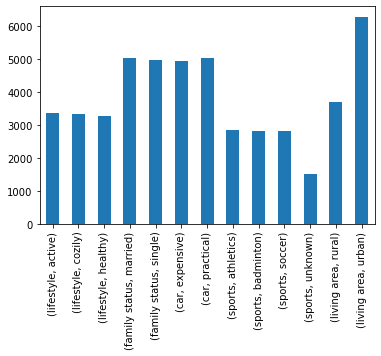

In [11]:
total_population = len(df_population_raw.index)
df_categorical.apply(pd.value_counts).T.stack().plot(kind='bar', legend=False)

In [12]:
print('response percentage (%)')
print(df_population_raw['label'].value_counts()*100/total_population)

response percentage (%)
no response    66.4
response       33.6
Name: label, dtype: float64


### 3.2 Data Exploration basics: age and earning outliers? 

/home/marco/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



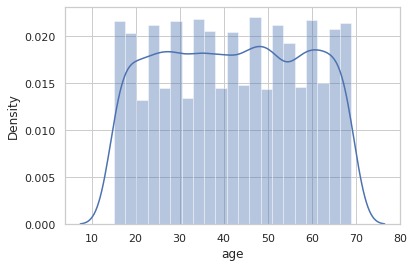

In [13]:
sns.set(style="whitegrid")

ax = sns.distplot(df_population_raw['age'])

/home/marco/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



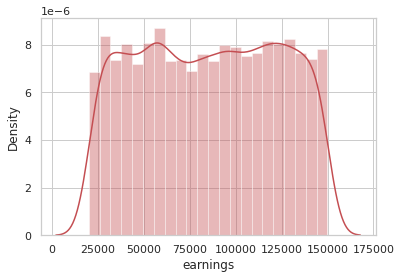

In [14]:
sns.set(style="whitegrid")

ax = sns.distplot(df_population_raw['earnings'], color = 'r')

In [15]:
df_population = df_population_raw

# convert responses into binary (no = 0, yes = 1)
df_population['response'] = df_population['label']
df_population  = df_population.replace({'response': {'no response': 0, 'response': 1}})

# Creating different datasets for response and non-response
df_responded = df_population[df_population['response'] == 1]
df_nonresponded = df_population[df_population['response'] == 0]

In [16]:
df_nonresponded

,name,age,lifestyle,zip code,family status,car,sports,earnings,living area,label,response
0,VnSEFOuL,62,cozily,50168,married,practical,athletics,102526,urban,no response,0
1,8Tv0hcce,34,active,66479,married,expensive,soccer,33006,urban,no response,0
5,w9voDHj0,21,healthy,60039,single,expensive,badminton,83376,urban,no response,0
6,VUkT58V5,22,healthy,69662,married,practical,badminton,49826,rural,no response,0
9,mWUY9Cjs,31,active,37460,married,practical,athletics,108695,rural,no response,0
...,...,...,...,...,...,...,...,...,...,...,...
9992,2xuEzcX6,52,active,70924,married,expensive,athletics,134074,rural,no response,0
9993,IDTsOWq0,32,cozily,30135,married,practical,badminton,58544,urban,no response,0
9994,pPbKcAlE,28,active,94924,single,expensive,badminton,120751,urban,no response,0
9995,N7SOtMkx,47,active,22571,single,practical,badminton,84508,rural,no response,0


<a id='Business_Questions'></a>
## 4. Business Questions

 ### 4.1 How do age an income correlate to response?  

Age distribution of responses

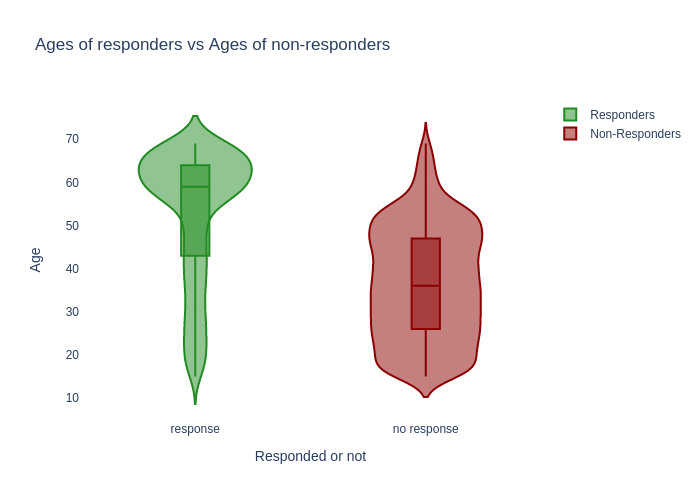

In [17]:
# Filling in the data inside the Violin Objects

violin_responders_age = go.Violin(
    y=df_responded['age'],
    x=df_responded['label'],
    name='Responders',
    marker_color='forestgreen',
    box_visible=True)

violin_nonresponders_age = go.Violin(
    y=df_nonresponded['age'],
    x=df_nonresponded['label'],
    name='Non-Responders',
    marker_color='darkred',
    box_visible=True)

data_age = [violin_responders_age, violin_nonresponders_age]


# Plot's Layout (background color, title, etc.)
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title='Ages of responders vs Ages of non-responders',
  xaxis=dict(
        title='Responded or not'
    ),
    yaxis=dict(
        title='Age'
    )
)

fig1 = go.Figure(data=data_age, layout=layout)

# save and display the image
if not os.path.exists("images"):
    os.mkdir("images")
fig1.write_image("images/fig1.png")


image1 = Image.open("images/fig1.png")
image1

Income distribution of responses

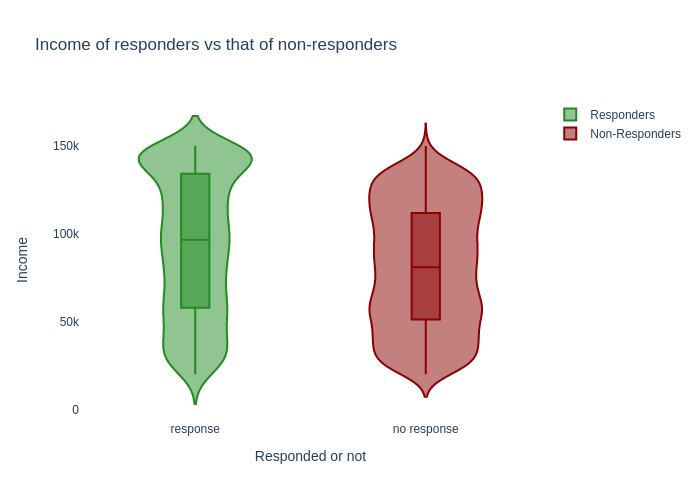

In [19]:
# Filling in the data inside the Violin Objects

violin_responders_income = go.Violin(
    y=df_responded['earnings'],
    x=df_responded['label'],
    name='Responders',
    marker_color='forestgreen',
    box_visible=True)

violin_nonresponders_income = go.Violin(
    y=df_nonresponded['earnings'],
    x=df_nonresponded['label'],
    name='Non-Responders',
    marker_color='darkred',
    box_visible=True)

income_data = [violin_responders_income, violin_nonresponders_income]

# plot data
# Plot's Layout (background color, title, etc.)
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title='Income of responders vs that of non-responders',
  xaxis=dict(
        title='Responded or not'
    ),
    yaxis=dict(
        title='Income'
    )
)
fig2 = go.Figure(data= income_data, layout=layout)

fig2.write_image("images/fig2.png")


image2 = Image.open("images/fig2.png")
image2

 ### 4.2 Which is the geographical distribution of responses?
 We don't have coordinates but we can extract geodata from ZIP codes

In [20]:
df_geo = df_population[['zip code','response']] # select relevant features

# amount of responses for each zipcode
#df_geo = df_geo.groupby(['zip code']).sum().reset_index()

In [21]:
print(df_geo.shape)

(10000, 2)


In [22]:
geo_zip_search = SearchEngine()  # search geographical infos from the zip code 
df_geo['state'] = df_geo['zip code'].apply(lambda x: geo_zip_search.by_zipcode(x).state) # apply search to each row in the zip code column and return the corresponding state

<ipython-input-22-ac205c411a23>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
# amount of responses by state
df_state = df_geo[['state', 'response']]
df_state['responsecount'] = df_state['response'] 
df_state = df_state.groupby(['state']).agg({'response':'sum','responsecount':'count'}).reset_index()
df_state['percentage_response'] = round((df_state['response']/df_state['responsecount'])*100, 1)
df_state.head(3)

,state,response,responsecount,percentage_response
0,AK,9,36,25.0
1,AL,30,96,31.2
2,AR,21,82,25.6


In [32]:
df_pop = pd.read_csv('data/population_bystate.csv')
df_state = df_state.merge(df_pop[['State', 'Code']], how = 'inner', left_on = 'state', right_on = 'Code')

In [25]:
df_state = df_state.drop(['state'], axis=1)

In [26]:
df_state = df_state.sort_values(by=['percentage_response'],ascending=False)
df_state.head(3)

,response,responsecount,percentage_response,State,Code
29,210,243,86.4,New York,NY
10,7,15,46.7,Hawaii,HI
23,19,42,45.2,Montana,MT


Text(0.5, 0, 'State')

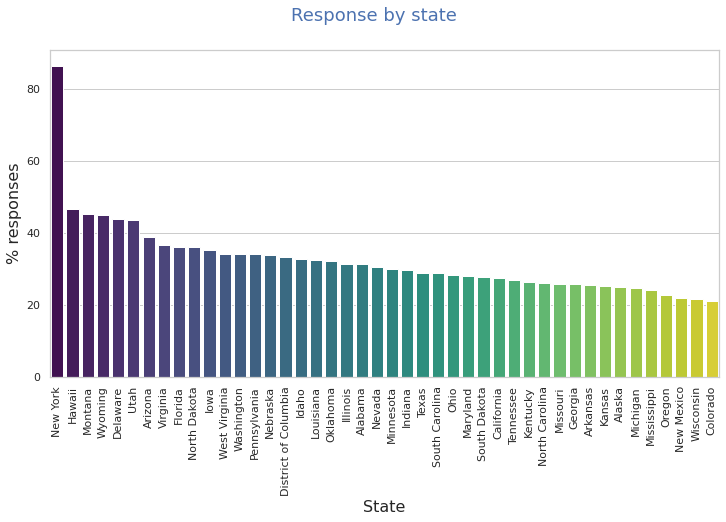

In [27]:
plt.figure(figsize= (12,6))
plt.suptitle('Response by state', fontsize=18, color = 'b')
#plt.bar(df_state["State"], df_state["percentage_response"], color = "g")
ax = sns.barplot(x='State', y="percentage_response", data=df_state,palette="viridis")
plt.xticks(rotation=90)

plt.ylabel('% responses', fontsize = 16)
plt.xlabel('State',fontsize = 16)


Visualization on US map

In [28]:
# initialize the map and store it in a m object
m = folium.Map(location=[40, -95], zoom_start=4)


url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

In [29]:
tests_proportion = df_state[['Code','percentage_response']]

folium.Choropleth(
geo_data=state_geo,
name='choropleth',
data = tests_proportion,
columns = ['Code','percentage_response'],
key_on='feature.id',
fill_color='YlGn',
fill_opacity=0.6,
line_opacity=0.2,
legend_name='Response (%)'
).add_to(m)

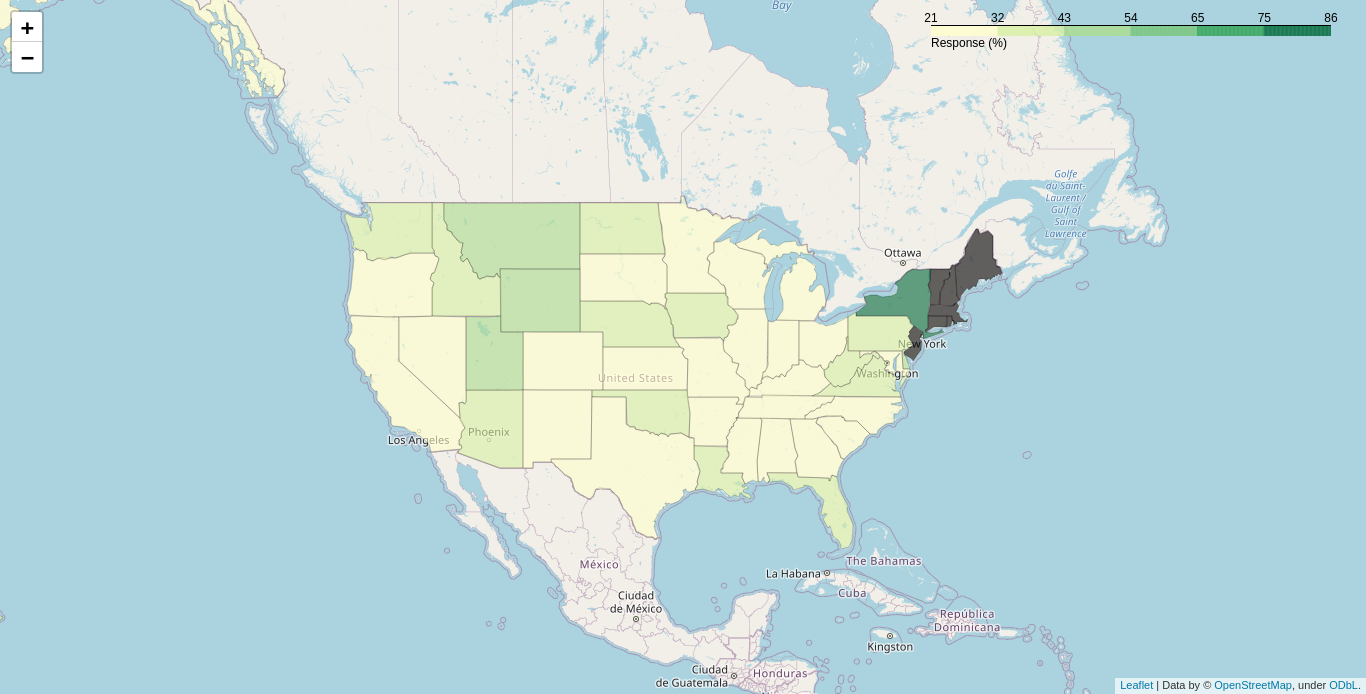

In [30]:
map_data = m._to_png(5)
mappa = Image.open(io.BytesIO(map_data))


mappa.save('images/cloropleth.png')
image3 = Image.open("images/cloropleth.png")
image3

<a id='Business_Questions'></a>

# Conclusion

### **What types of verifications are hosts using?**
Looking at the security verifications I want to see what the different types were and how many were associated with the listings. The data seems to show that phone calls, emails and "government id" were in the top 3. About 70% of the listings had a "government id" as one of the verifications and in my mind that would be suitable, especially if you're letting someone into your property that you do not know.

### **Which types of amenities are hosts using? Would they give a good review score?**
Now with amenities these are the items that you would hope would make a guest enjoy their stay and in turn give you an outstanding review. The table below shows the amenities by the number of listings with the calculated minimum, maximum and average review value. The top 20 amenities seem to show that luxuries certainly do help with the average review and having the option for allowing pets i.e. dogs also helps.

### **What could possibly an acceptable price?**
My first thoughts with the price was to look at the data from a view of the London boroughs. Was there any areas within London that were the most expensive? or was there an even spread of the prices.

When initially viewing the London map, it shows that the majority of the prices that range from £111 to £223 are within the central/west, which would presume that the borough of Westminster would be one of the most expensive. The lower prices are evenly spread throughout London which would confirm that these properties would be more affordable.

The average price for the different boroughs shows that the City of London, Kensington and Chelsea, and also Westminster are the top 3 boroughs with the largest average price.

# Next Steps

In my next notebook, I will be conducting a model evaluation to try to predict the price per night for a property